# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
*Special Exception for this Lab-04. \\
  a) "for" loops is not allowed.  \\
  b) you have to use np.interp(), np.cumsum(), np.arange(), cv2.LUT() to replace "for" loop in your logic. \\
  c) Code with "for" loop based solution will be heavily penalized (more than 50%).


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
img = cv.imread('BasketBallCourt01_low-gray.png',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

Image Size is (400, 600)


AttributeError: module 'matplotlib' has no attribute 'backends'

Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x000001D527C22160> (for post_run_cell), with arguments args (<ExecutionResult object at 1d527b57710, execution_count=3 error_before_exec=None error_in_exec=module 'matplotlib' has no attribute 'backends' info=<ExecutionInfo object at 1d526d0da60, raw_cell="img = cv.imread('BasketBallCourt01_low-gray.png',c.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/d%3A/collegeCode/sem4/csd212/lab4/CSD212_Demo_4_Histogram_Equilization_Ques_P2_Batch.ipynb#W2sZmlsZQ%3D%3D> result=None>,),kwargs {}:


AttributeError: module 'matplotlib' has no attribute 'backends'

Image Size is (400, 600)


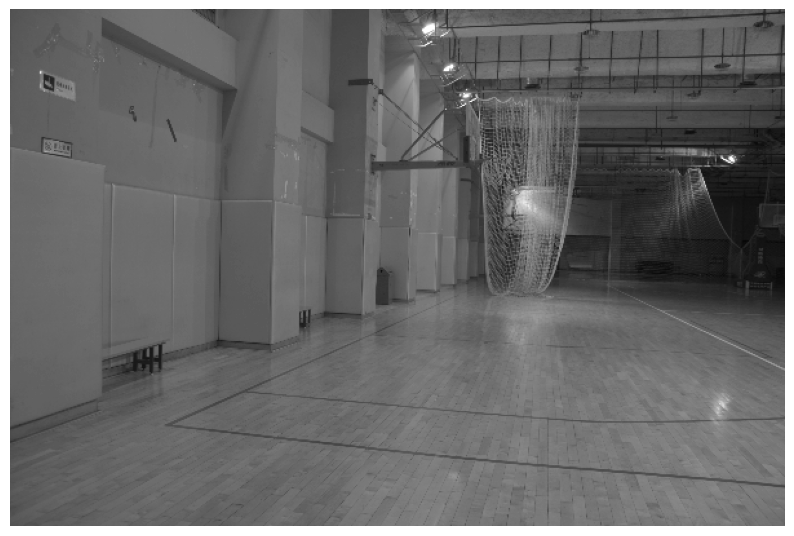

In [17]:
img_GT = cv.imread('BasketBallCourt01_high-gray.png',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img_GT.shape))
plt.figure(figsize=(10,10))
plt.imshow(img_GT, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [18]:
img.dtype

dtype('uint8')

# Calculate Histogram (GIVEN)

In [19]:
img_flat = img.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist,bins = np.histogram(img_flat,256,[0,256])

<BarContainer object of 256 artists>

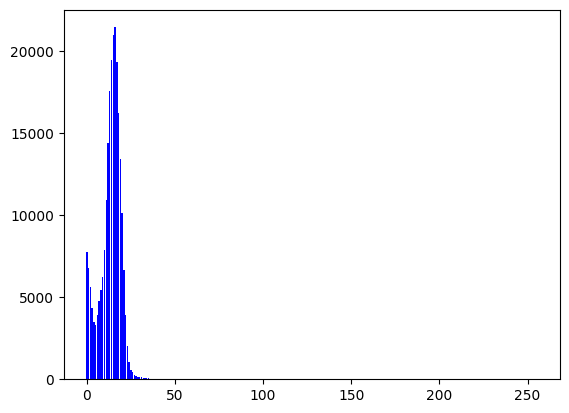

In [20]:
plt.bar(bins[:-1],hist,color='b')

In [21]:
print(bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [33]:
print(hist)

NameError: name 'hist' is not defined

#Q1) a) Calculate pmf of Histogram store it in 'hist_pmf'. [2 Marks]
#b) Calculate cdf of that pmf and store it in 'hist_cdf'. [1 Marks]

240000
21471
0


<function matplotlib.pyplot.show(close=None, block=None)>

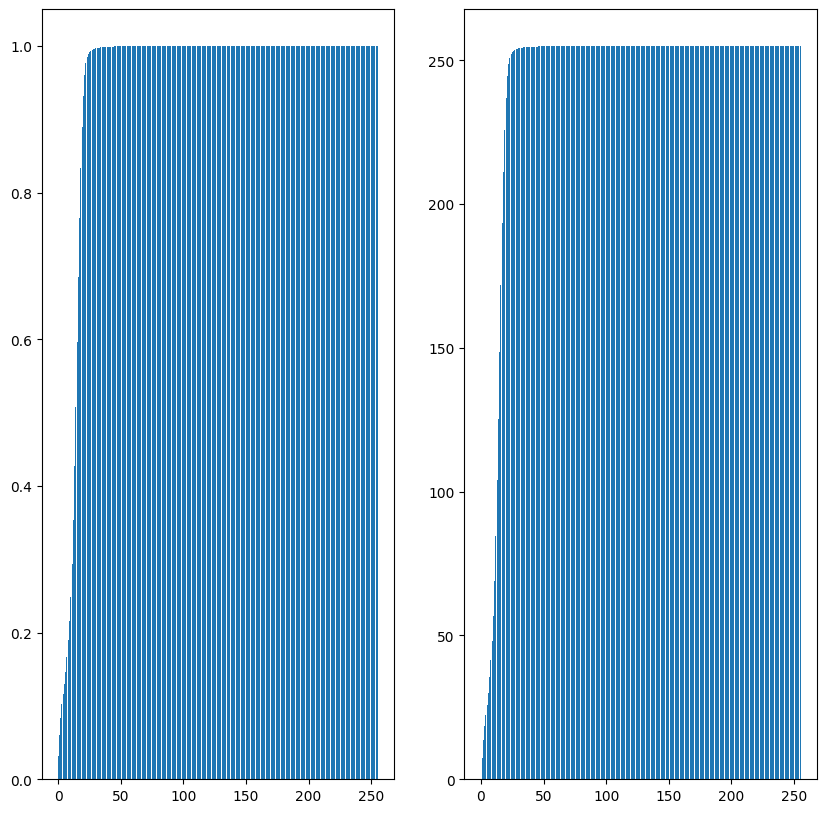

In [27]:
#a)
hist_pmf=hist/np.sum(hist)
print(np.sum(hist))
print(np.max(hist))
print(np.min(hist))
#b)
hist_cdf=np.cumsum(hist_pmf)
hist_cdf_normalized=(hist_cdf-hist_cdf.min())*255/(hist_cdf.max()-hist_cdf.min())

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.bar(bins[:-1], hist_cdf)
plt.subplot(122)
plt.bar(bins[:-1], hist_cdf_normalized)
plt.show

#Q2) Calculate/Implement Histogram equilization transformation function $T(r)$ [3 Marks]

In [28]:
def T(image):
    #T(r)=(L-1)*CDF(r)
    image_equalized=(np.max(bins)-1)*hist_cdf
    image_equalized = image_equalized.astype(np.uint8)
    return image_equalized[image]

#Q3) Apply $T(r)$ on input image. [2 Marks]
#Store output image in 'out_img1'

In [29]:
out_img1=T(img)

#Show input image and output images.

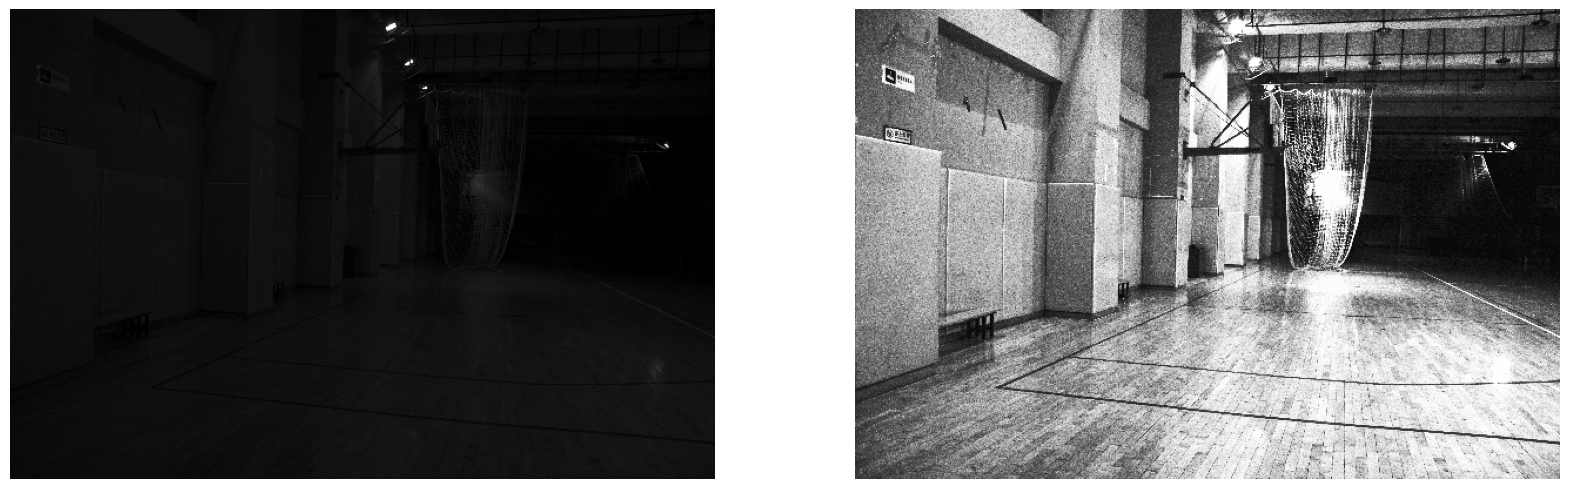

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(out_img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


<BarContainer object of 256 artists>

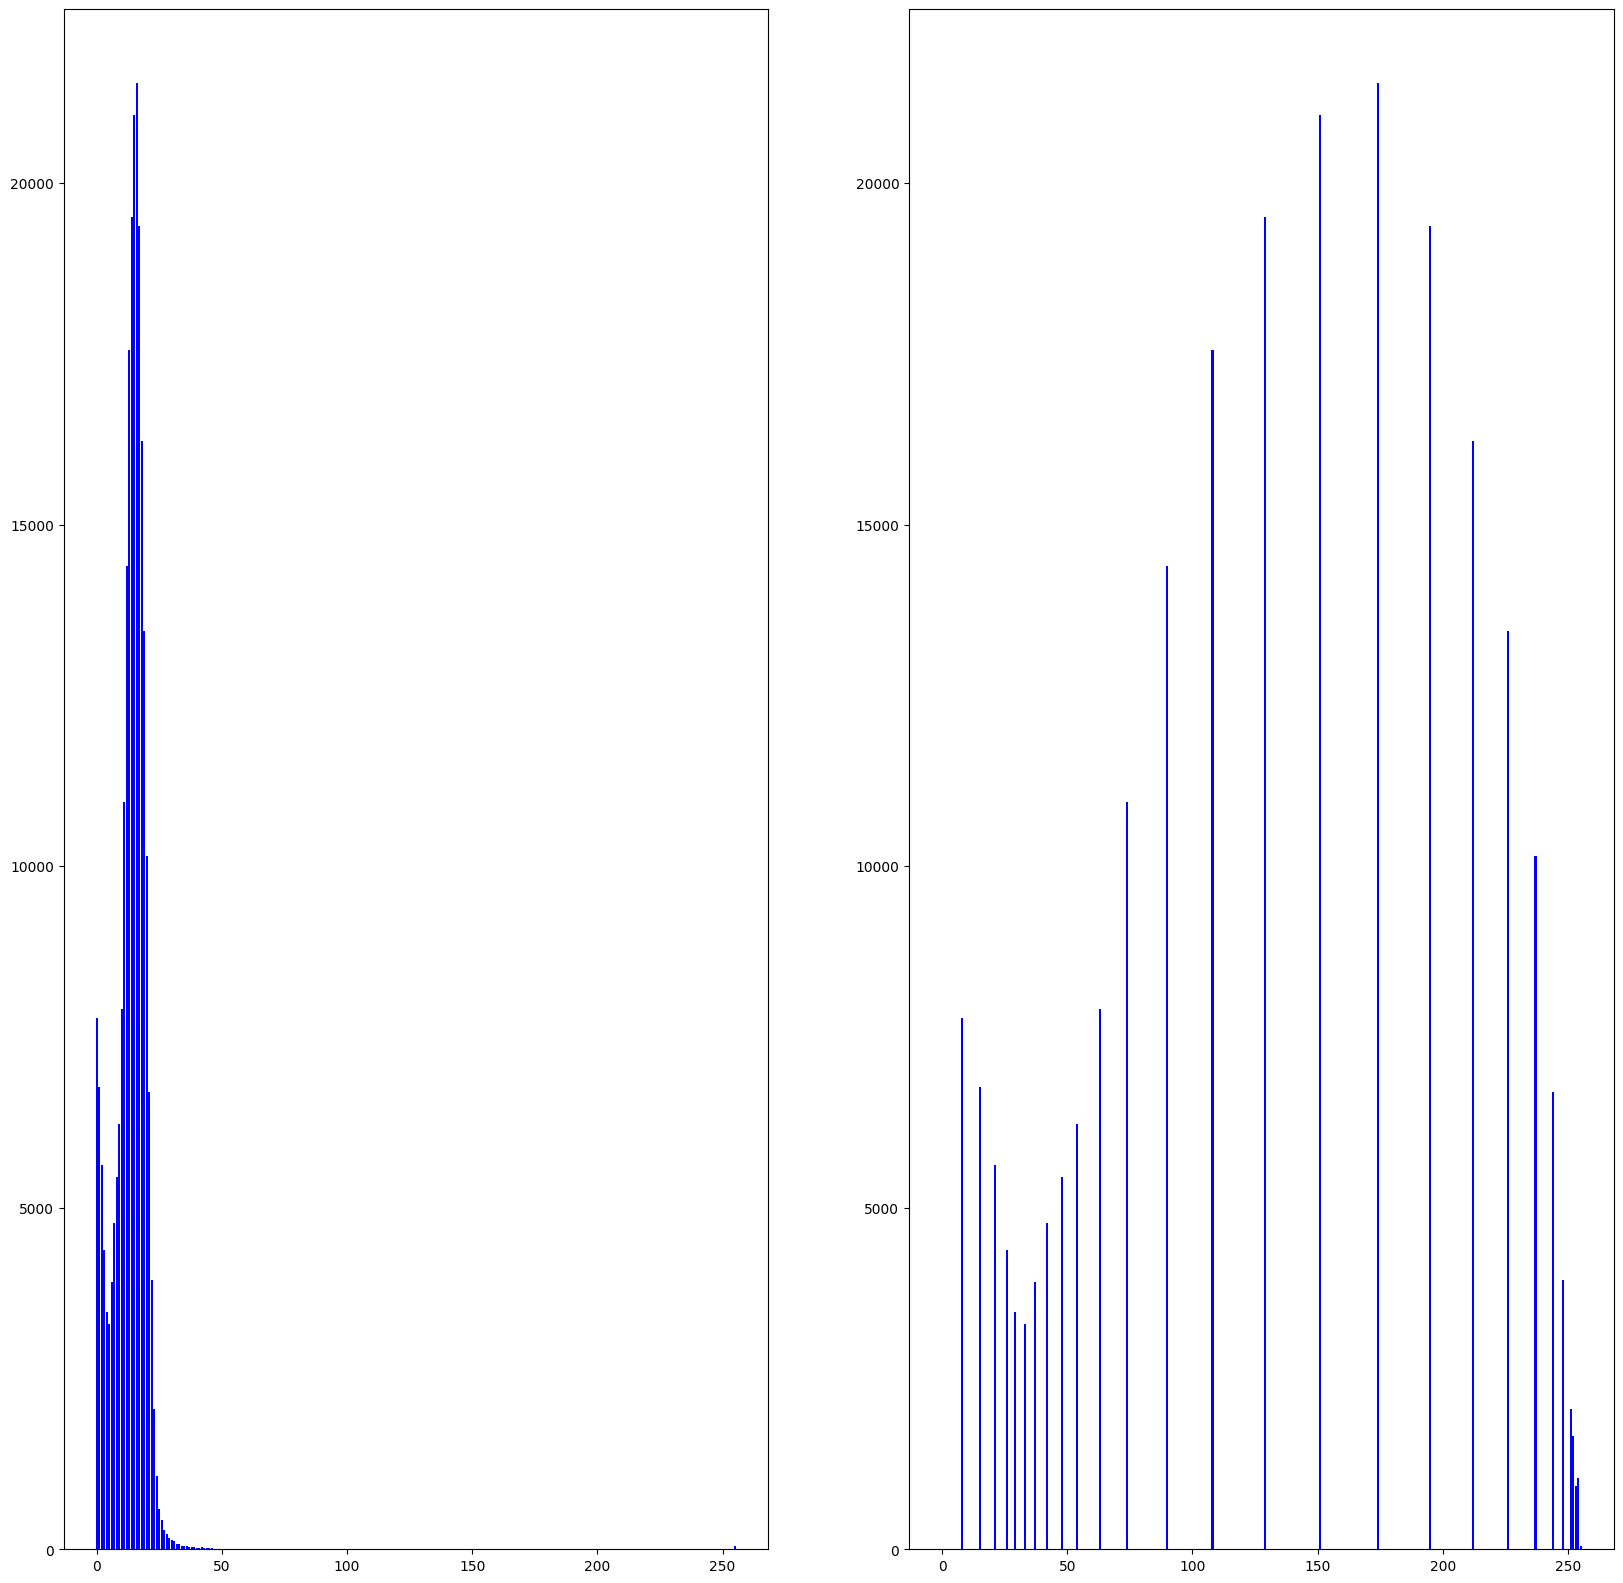

In [31]:
img_flat = img.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist,bins = np.histogram(img_flat,256,[0,256])

img_flat_output = out_img1.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist_output,bins_output = np.histogram(img_flat_output,256,[0,256])

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.bar(bins[:-1],hist,color='b')
plt.subplot(122)
plt.bar(bins_output[:-1],hist_output,color='b')


#Q4)calculate its root mean squared error (RMSE) with $img\_GT$ [2 Marks]

In [32]:
def rmse(out_img, img_gt):
    
    if out_img.shape != img_gt.shape:
        raise ValueError("Images must have the same dimensions")
    
    squared_diff = (out_img - img_gt) ** 2
    
    mse = np.mean(squared_diff)
    
    rmse_value = np.sqrt(mse)
    
    return rmse_value

print(rmse(out_img1, img_GT))

10.285836742822628
